<a href="https://colab.research.google.com/github/tamzid1984/DeepLearning/blob/main/NerualnetworklImplemenntationn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# 1.  Input Data
# 2.  OutPut Data
# 3.  Predicted Result/Data
# 4.  Test data


#            Train Data
input_train_data = np.array([[0, 1, 0],
                           [0, 1, 1], 
                           [0, 0, 0],
                           [10, 0, 0], 
                           [10, 1, 1], 
                           [10, 0, 1]])

out_train_data = np.array([[0], [0], [0], [1], [1], [1]])

input_data_prediction = np.array([1, 1, 0])



#         Test Data

input_test_data = np.array([[1, 1, 1],
                           [10, 0, 1], 
                           [0, 1, 10],
                           [10, 1, 10], 
                           [0, 0, 0], 
                           [0, 1, 1]])

out_test_data = np.array([[0], [0], [0], [1], [1], [1]])

In [3]:
scaller = MinMaxScaler()

In [4]:
input_train_data_scaled = scaller.fit_transform(input_train_data)
input_test_data_scaled = scaller.fit_transform(input_test_data)

out_train_data_scaled = scaller.fit_transform(out_train_data)
out_test_data_scaled = scaller.fit_transform(out_test_data)

In [5]:
print("Input TrainScalled Data: ", input_train_data_scaled)
print("\n Input Test Scalled Data: ", input_test_data_scaled )

print("\n Output Train Scalled Data: ", out_train_data_scaled)
print("\nOutput test Scalled Data: ", out_test_data_scaled)

Input TrainScalled Data:  [[0. 1. 0.]
 [0. 1. 1.]
 [0. 0. 0.]
 [1. 0. 0.]
 [1. 1. 1.]
 [1. 0. 1.]]

 Input Test Scalled Data:  [[0.1 1.  0.1]
 [1.  0.  0.1]
 [0.  1.  1. ]
 [1.  1.  1. ]
 [0.  0.  0. ]
 [0.  1.  0.1]]

 Output Train Scalled Data:  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]

Output test Scalled Data:  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]]


In [7]:
#.npy

np.save("SavedData/input_train_data_scaled.npy", input_train_data_scaled)
np.save("SavedData/input_test_data_scaled.npy",input_test_data_scaled)
np.save("SavedData/input_data_prediction.npy",input_data_prediction)

np.save("SavedData/out_train_data_scaled.npy", out_train_data_scaled)
np.save("SavedData/out_test_data_scaled.npy", out_test_data_scaled)

In [8]:
class Neuralnetwork():
    
    def __init__(self):
        
        self.inputSize = 3
        self.hiddenSize = 3
        self.outputSize = 1
        
        
        self.W1 = np.random.rand(self.inputSize, self.hiddenSize)
        self.W2 = np.random.rand(self.hiddenSize, self.outputSize)
        self.limit = 0.5
        
        
        self.error_list = []
        
        self.true_positives = 0
        self.true_negatives = 0
        self.false_positives = 0
        self.false_negatives = 0
        
    def forward(self, X):
        self.z = np.matmul(X, self.W1)
        self.z2 = self.sigmoid(self.z)
        self.z3 = np.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3)
        return o
        
        
    def sigmoid(self, s):
        return 1 / (1+ np.exp(-s))
        
    
    def sigmoidPrime(self, s):
        return s*(1-s)
    
    
    
    def backward(self, X, y, o):
        self.o_error = y - o
        self.o_delta = self.o_error *  self.sigmoidPrime(o)
        
        self.z2_error = np.matmul(self.o_delta, np.matrix.transpose(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2_error)
        
        self.W1 += np.matmul(np.matrix.transpose(X),self.z2_delta)
        self.W2 += np.matmul(np.matrix.transpose(self.z), self.o_delta)
        
        
    def train(self, X, y, epochs):
        for epoch in range(epochs):
            o = self.forward(X)
            self.backward(X, y, o)
            self.error_list.append(np.abs(self.o_error).mean()) # see line number 15
            
            
    def predict(self, x_test_data):
        return self.forward(x_test_data).item()
        
    
    def error_visualization(self):
        
        plt.plot(range(len(self.error_list)), self.error_list)
        plt.title("Error Visulatization")
        plt.xlabel("epochs")
        plt.ylabel("Loss Value")
        
        
        
    def evaluate(self, input_Data, output_Data):
        for i , testingEvaluation in enumerate(input_Data):
            
            if self.predict(testingEvaluation) > self.limit and output_Data[i] == 1:
                self.true_positives +=1
            if self.predict(testingEvaluation) < self.limit and output_Data[i] == 1:
                self.true_negatives +=1
            if self.predict(testingEvaluation) > self.limit and output_Data[i] == 0:
                self.false_positives += 1
            if self.predict(testingEvaluation) < self.limit and output_Data[i] == 0:
                self.false_negatives +=1
                
                
        print("True Positive Values:", self.true_positives)
        print("True negatives Values:", self.true_negatives)
        print("False Positive Values:", self.false_positives)
        print("False negatives Values", self.false_negatives)
        
        
    

In [9]:
#.npy

train_scalled_data = np.load("SavedData/input_train_data_scaled.npy")
train_test_scalled_data = np.load("SavedData/input_test_data_scaled.npy")
prediction_scalled_data = np.load("SavedData/input_data_prediction.npy")

output_scalled_data = np.load("SavedData/out_train_data_scaled.npy")
output_testscalled_data = np.load("SavedData/out_test_data_scaled.npy")

True Positive Values: 3
True negatives Values: 0
False Positive Values: 3
False negatives Values 0


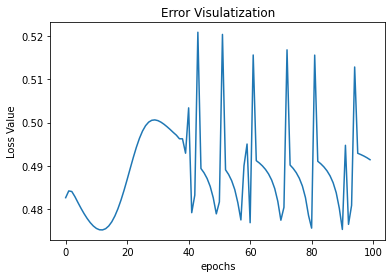

In [10]:
Network = Neuralnetwork()
Network.train(input_train_data_scaled, output_scalled_data, 100)
Network.predict(prediction_scalled_data)
Network.error_visualization()
Network.evaluate(input_test_data_scaled, out_test_data_scaled)

In [11]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

trainingData = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], 'float32') 
TestingData = np.array([[0], [1], [1], [0]], 'float32')

model = Sequential()

model.add(Dense(32, input_dim = 2, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))


model.compile(loss = 'mean_squared_error',
            optimizer = 'adam',
            metrics = ['binary_accuracy'])

model.fit(trainingData, TestingData, epochs = 10)
result = model.evaluate(trainingData, TestingData)


Epoch 1/10
1/1 [==============================] - 1s 636ms/step - loss: 0.2419 - binary_accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2412 - binary_accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 8ms/step - loss: 0.2405 - binary_accuracy: 0.7500
Epoch 4/10
1/1 [==============================] - 0s 7ms/step - loss: 0.2398 - binary_accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 11ms/step - loss: 0.2391 - binary_accuracy: 0.7500
Epoch 6/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2384 - binary_accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 10ms/step - loss: 0.2377 - binary_accuracy: 0.7500
Epoch 8/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2370 - binary_accuracy: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 6ms/step - loss: 0.2363 - binary_accuracy: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 102ms/step - lo

In [12]:
model.predict(trainingData.round())

1/1 [==============================] - 0s 71ms/step


array([[0.4962469],
       [0.5677426],
       [0.6105833],
       [0.5959155]], dtype=float32)

In [14]:
estingData = np.array([[0], [1], [1], [0]], 'float')

In [15]:
estingData

array([[0.],
       [1.],
       [1.],
       [0.]])